# Problem 1

## 1.1 )  Brute Force Pattern Matching Algorithm

In [2]:
def find_brute(T,P):
    n,m = len(T),len(P)
    for i in range(n-m+1):
        k = 0
        while k < m and T[i+k] == P[k]:
            k+=1
        if k == m :
            return i
    return -1

In [7]:
find_brute('ATGCATGGCCAATA','ATA')

11

For the given input, the above brute force string matching algorithm runs in "Ω(dp)" time where 'd' is the length of the text and 'p' is the length of the pattern. This is because for the pattern of length 'p' we compare each character of the pattern to a substring of the text 't' until there is a mismatch (which in this case performs 'p' character comparisions when all characters of text match the pattern except the last one) or a full match. 

In the worst case the pattern undergoes 'p' comparisions 'd' times (pattern comparision starts from each character of the string except when the length of the remaining substring is lesser than the pattern itself)  

## 1.2 )  Python’s str class and pattern-matching

In the below section, we modify the programs from 1.1 in such a manner that instead of the program terminating after finding a single match it continues to find other matches until the end of the string and returns the number of such matches.

The strategy to solve this is, when the program gets its first match, instead of returning the answer we increment the counter and skip to the part of the text after the match so as to prevent overlapping matches. The modified algorithms all follow the above discussed approach.

### 1.2.1 ) Modified Brute Force

In [24]:
def find_brute_multiple(T,P):
    n,m = len(T),len(P)
    count = 0
    i = 0
    while i < n-m+1:
        k = 0
        while k < m and T[i+k] == P[k]:
            k+=1
        if k == m :
            count+=1
            i+=m
        i+=1
    return count

In [25]:
find_brute_multiple('ATGCATGGCCAATA','TG')

2

In [26]:
find_brute_multiple('cdcdcdcdc','cdc')

2

In [27]:
find_brute_multiple('Hello there. Hello ? Can you hear me ? Helloooo','Hello')

3

### 1.2.2 ) Modified Boyer Moore

Original Implementation of of Boyer Moore using the bad character rule

In [39]:
# Boyer - Moore
def find_boyer_moore(T,P): 
    n, m = len(T),len(P) 
    if m == 0:
        return 0 
    last = {}
    for k in range(m): 
        last [P[k]] = k
    i = m -1 
    k = m -1
    while i < n:
# If match , decrease i, k 
        if T[i] == P[k]:
            if k == 0:
                return i 
            else :
                i -= 1
                k -= 1
    # Not match , reset the positions 
        else :
            j = last.get( T[ i],-1) 
            i += m - min ( k, j +1)
            k = m -1
    return -1


In [40]:
find_boyer_moore('ATGCATGGCCAATA','ATA')

11

**Modified Implementation of of Boyer Moore using the bad character rule to count multiple non overlapping occurences** 

In [53]:
# Boyer - Moore for multiple non=overlapping occurences
def find_boyer_moore_multiple(T,P): 
    n, m = len(T),len(P)
    count = 0
    if m == 0:
        return 0 
    last = {}
    for k in range(m): 
        last [P[k]] = k
    i = m -1 
    k = m -1
    while i < n:
# If match , decrease i, k 
        if T[i] == P[k]:
            if k == 0:
                count+=1
                i+=m
            else :
                i -= 1
                k -= 1
    # Not match , reset the positions 
        else :
            j = last.get( T[ i],-1) 
            i += m - min ( k, j +1)
            k = m -1
    return count


In [54]:
find_boyer_moore_multiple('cdcdcdcdc','cdc')

2

### 1.2.3 ) Modified KMP

Original Implementation of KMP

In [546]:
# KMP failure function 
def compute_kmp_fail ( P):
    m = len(P) 
    fail = [0] * m 
    j = 1
    k = 0
    while j < m:
        if P[j] == P[k]: 
            fail[j] = k+1 
            j += 1
            k += 1
        elif k > 0:
            k = fail[k -1] 
        else :
            j+= 1
    return fail

In [547]:
# KMP
def find_kmp(T,P):
    n, m = len(T),len(P) 
    if m == 0:
        return 0
    fail = compute_kmp_fail(P) # print ( fail )
    j = 0
    k = 0
    while j < n:
        if T[j] == P[k]: 
            if k == m-1:
                return j-m+1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k -1] 
        else :
            j += 1
    return -1


In [548]:
find_kmp('ATGCATGGCCAATA','ATA')

11

**Modified Implementation of KMP to count multiple non overlapping occurences**

In [420]:
# KMP
def find_kmp_multiple(T,P):
    n, m = len(T),len(P) 
    count = 0
    if m == 0:
        return 0
    fail = compute_kmp_fail(P) # print ( fail )
    j = 0
    k = 0
    while j < n:
        if T[j] == P[k]: 
            if k == m-1:
                k=0
                j+=1
                count+=1
#                 return j-m+1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k -1] 
        else :
            j += 1
    return count

In [422]:
find_boyer_moore_multiple('cdcdcdcdc','cdc')

2

# Problem 2

In [ ]:
import random
import string

### Assumptions Made 

- Only Upper case alphabets used for testing purpose  

## 2.1) Experimental analysis of Pattern Matching based on Number of Character comparisions

The first step to perform the experimental analysis for number of comparisions vs the pattern length is to modify the functions for brute-force, KMP and Boyer-Moore such that we return the count of character comparisions made to find a string occurence when running the 3 algorithms, this is what we perform in the below code blocks. 

**Modified brute-force, KMP and Boyer-Moore algorithms that count number of character comparisions made to search strings** 

In [178]:
# Add the code for these and verify once if the results make any sense

In [306]:
def find_brute_comparision(T,P):
    n,m = len(T),len(P)
    count = 0
    for i in range(n-m+1):
        k = 0
        while k < m and T[i+k] == P[k]:   
            count+=1
            k+=1
        if k<m:
            if T[i+k] != P[k]:
                count+=1
        if k == m :
            return count
    return count

In [435]:
find_brute_comparision("DABAACAADAABAABA","DAA") # Testing output

13

In [284]:
# Boyer - Moore
def find_boyer_moore_comparision(T,P): 
    n, m = len(T),len(P) 
    count = 0
    if m == 0:
        return 0 
    last = {}
    for k in range(m): 
        last [P[k]] = k
    i = m -1 
    k = m -1
    while i < n:
# If match , decrease i, k 
        if T[i] == P[k]:
#             print('Match')
#             print(T[i],P[k])
            count+=1
            if k == 0:
                return count
            else :
                i -= 1
                k -= 1
    # Not match , reset the positions 
        else :
#             print('Mismatch')
            count+=1
            j = last.get( T[ i],-1) 
            i += m - min ( k, j +1)
            k = m -1
    return count


In [304]:
find_boyer_moore_comparision("DABAACAADAABAABA","AABA") # Testing output

13

In [615]:
# KMP
def find_kmp_comparision(T,P):
    n, m = len(T),len(P) 
    count = 0
    if m == 0:
        return 0
    fail = compute_kmp_fail(P) # print ( fail )
    j = 0
    k = 0
    while j < n:
        count+=1
#         print(T[j],P[k],count)
        if T[j] == P[k]: 
            if k == m-1:
                return count
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1] 
        else :
            j += 1
    return count


In [616]:
find_kmp_comparision("DABAACAADAABAABA","DAA") # Testing output

12

Once we have modified the functions for Brute-Force, Boyer-Moore and KMP in such a manner that they return the number of character comparisions made when running them on given 'Text' and 'Pattern' inputs, the next step is to generate a random large sized input document.

The below function rand_str uses the random module to generate a random string of any given length. 

The next function rand_pat uses the random module to generate random patterns that may or may not belong to the string. We decided to assign a 0.75 probability that the pattern is a substring of the given Text and 0.25 probability that it doesn't belong to the string so as to introduce all the possible variations observed in the patterns we see in the real world. 

**Function to return a random string of a given size**

**Reference : https://stackoverflow.com/questions/2257441/random-string-generation-with-upper-case-letters-and-digits**

In [460]:
def rand_str(n):
    return ''.join(random.choice(string.ascii_uppercase) for _ in range(n))

**Function to return a pattern string of a given size for a given string**

In [712]:
def rand_pat(s,n):
    s_len = len(s)
    
    '''
    To choose if the pattern is a substring (~75% chance) or not a substring (~25% chance). 
    This is to introduce all the possible variations observed in the pattern in the real world.
    ''' 
    substr_or_not = random.randint(1,4)
    if substr_or_not == 1: # This is the case when we return a pattern that is not a substring of the given string
        start_index = random.randint(0,s_len-n-1)
        return s[start_index:start_index+n-1]+'a'
#         return n*'a'
    else:
        start_index = random.randint(0,s_len-n-1)
        return s[start_index:start_index+n]

#     start_index = random.randint(0,s_len-n-1)
#     return s[start_index:start_index+n]
    

The last and final step is to generate a random string using the above functions and then measuring the number of string comparisions made for patterns of varying length (for each of the 3 algorithms). 

Once we are able to obtain these results we plot a graph comparing the Number of character comparisions for different pattern lengths.

In [713]:
test_str = rand_str(100) # Generate a random string of length 100

In [714]:
dict_brute = {}
dict_bm = {}
dict_kmp = {}

In [715]:
for pat_len in range(1,len(test_str)-1):
    
    pat = rand_pat(test_str,pat_len)
    
    dict_brute[pat_len] = find_brute_comparision(test_str,pat)
    
    dict_bm[pat_len] = find_boyer_moore_comparision(test_str,pat)
    
    dict_kmp[pat_len] = find_kmp_comparision(test_str,pat)
    

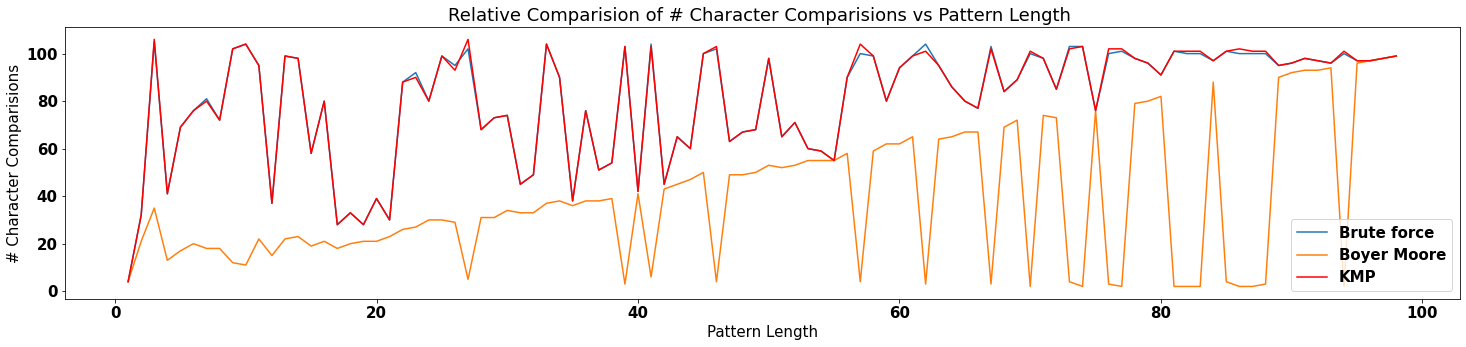

In [726]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,5)
font = {'size'   : 15}
matplotlib.rc('font', **font)
plt.plot(dict_brute.keys(),dict_brute.values(),label='Brute force')
plt.plot(dict_bm.keys(),dict_bm.values(),label='Boyer Moore')
plt.plot(dict_kmp.keys(),dict_kmp.values(),label='KMP',color='red')
plt.xlabel('Pattern Length')
plt.ylabel('# Character Comparisions')
plt.title('Relative Comparision of # Character Comparisions vs Pattern Length ')
plt.legend(loc=4)
plt.show()

**Observation:** Here we observe that Boyer Moore consistly seems to have the least number of string comparisions for a given input size, the reason for this could be that Boyer moore starts scanning from the reverse thus possibly avoid unnecessary comparisions that would have been made only to realize that the final few characters did not match. 

Another surprising observation is that Brute force and KMP seem to be performing almost the exact same number of character comparisions, when we expect KMP to be far more superior. The reason for KMPs poor performance in this case could be the input Text string. KMP performs well when there is more overlapping parts in the string

In [717]:
import time

In [718]:
dict_brute_time = {}
dict_bm_time = {}
dict_kmp_time = {}

In [719]:
test_str = rand_str(1000)

In [720]:
for pat_len in range(1,len(test_str)-1,5):
#     print(pat)
    pat = rand_pat(test_str,pat_len)
    
    t1 = time.time()
    find_brute(test_str,pat)
    t2 = time.time()
    dict_brute_time[pat_len] = t2-t1
    
    
    t1 = time.time()
    find_boyer_moore(test_str,pat)
    t2 = time.time()
    dict_bm_time[pat_len] = t2-t1
    
    
    t1 = time.time()
    find_kmp(test_str,pat)
    t2 = time.time()
    dict_kmp_time[pat_len] = t2-t1

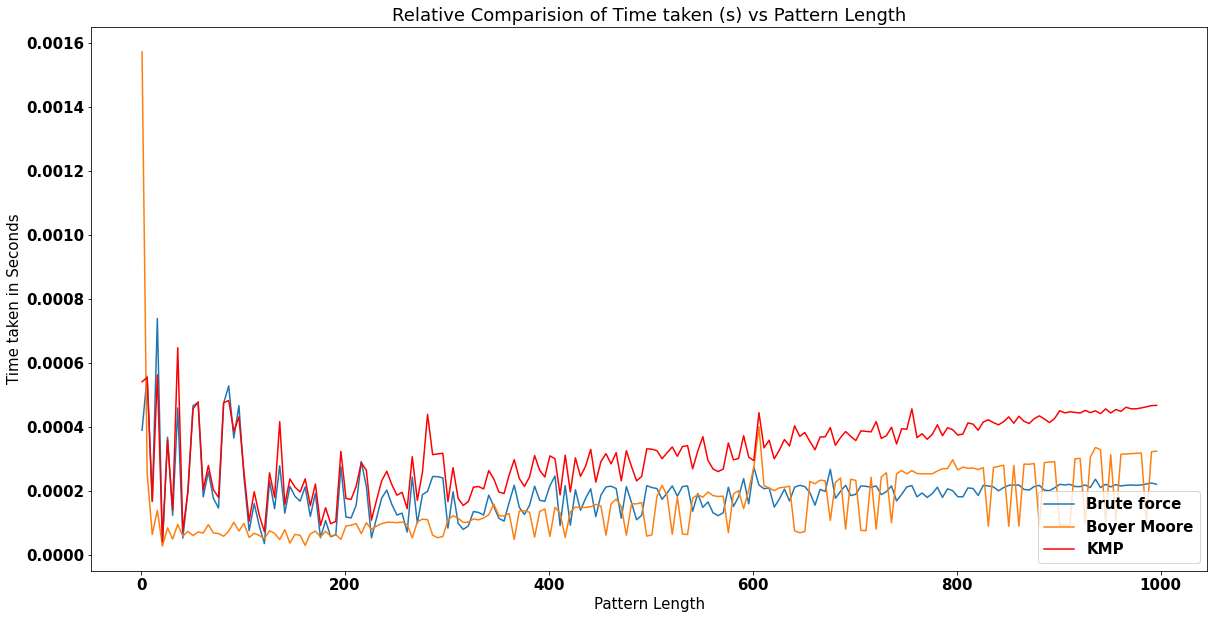

In [721]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
font = {'size'   : 15}
matplotlib.rc('font', **font)
plt.plot(dict_brute_time.keys(),dict_brute_time.values(),label='Brute force')
plt.plot(dict_bm_time.keys(),dict_bm_time.values(),label='Boyer Moore')
plt.plot(dict_kmp_time.keys(),dict_kmp_time.values(),label='KMP',color='red')
plt.xlabel('Pattern Length')
plt.ylabel('Time taken in Seconds')
plt.title('Relative Comparision of Time taken (s) vs Pattern Length')
plt.legend(loc=4)
plt.show()

**Observation :** Here we observe once again that Boyer Moore is consistently faster that KMP and Brute force. 
For shorter pattern lengths, KMP performs slightly better than Brute force, but as the pattern length increases it is clear that KMP takes more time than both the other algorithms.

# Problem 3

MCM Brute force solution

In [722]:
def MCM_naive(par,i,j):

  if (i == j):
    return 0
  
  minimum = 100000
  for k in range(i,j):
    count = (MCM_naive(par,i,k) + MCM_naive(par,k+1,j) + (par[i-1] * par[k] * par[j]))
    if(count < minimum):
      minimum = count

  return (minimum)

arr1 = [1,2,3,4,3]
length_of_arr = len(arr1)

print(MCM_naive(arr1,1,length_of_arr-1))


30


In [730]:
# Ref slides from week 11


#optimal parenthesis
def print_opt(s,i,j):
    if i == j:
        print("M{}".format(i),end='')
    else:
        print('(',end='')
        print_opt(s,i,s[i][j])
        print_opt(s,s[i][j] + 1,j)
        print(')',end='')

#Bottom-up approach
def matrix_bottom(p):
    n = len(p)
    m = [[0 for i in range(n)] for i in range(n)]
    s = [[0 for i in range(n)] for i in range(n)]
    for i in range(1,n):
        m[i][i] = 0
    for l in range(2,n):
        for i in range(1,n-l+1):
            j = i + l - 1
            m[i][j] = float('inf')
            for k in range(i,j):
                q = m[i][k] + m[k+1][j] + p[i-1]*p[k]*p[j]
                if q < m[i][j]:
                    m[i][j] = q
                    s[i][j] = k
    print("The order of parentization is:\n")
    print_opt(s,1,n-1)
    print('\n')
    print("Minimum number of calculations is {}".format(m[1][n-1]))
    return m,s

In [731]:
matrix_bottom([20,35,15,18,10,20,29])

The order of parentization is:

((M1(M2(M3M4)))(M5M6))

Minimum number of calculations is 26550


([[0, 0, 0, 0, 0, 0, 0],
  [0, 0, 10500, 15900, 14950, 18950, 26550],
  [0, 0, 0, 9450, 7950, 14950, 23900],
  [0, 0, 0, 0, 2700, 5700, 12850],
  [0, 0, 0, 0, 0, 3600, 11020],
  [0, 0, 0, 0, 0, 0, 5800],
  [0, 0, 0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 2, 1, 4, 4],
  [0, 0, 0, 2, 2, 4, 4],
  [0, 0, 0, 0, 3, 4, 4],
  [0, 0, 0, 0, 0, 4, 4],
  [0, 0, 0, 0, 0, 0, 5],
  [0, 0, 0, 0, 0, 0, 0]])

In [724]:
# memoization approach
def MCM_TD(arr1, i, j):
    if(i == j):
        return 0
     
    if(mat[i][j] != -1):
        return mat[i][j]
     
    mat[i][j] = float('inf')
     
    for k in range(i,j):
        mat[i][j] = min(mat[i][j], (MCM_TD(arr1, i, k) + MCM_TD(arr1, k + 1, j)+ arr1[i - 1] * arr1[k] * arr1[j]))
     
    return mat[i][j]

arr1 = [1, 2, 3, 4, 3]
n = len(arr1)
mat = [[-1 for i in range(len(arr1))] for j in range(len(arr1))]
i = 1
j = n - 1
MCM_TD(arr1,i , j)

30

# Problem 4

In this program our aim is to find the longest common subsequence. It is different from the longest common substring as in longest common subsequence the strings need not have to be contiguous. 

This problem can be solved recursively or iteratively and can be enhanced using Dynamic programming. We chose the iterative method so that we would not hit hte recursion limit for larger inputs. The input files are Nucleotide sequences for H1N1 and Ebola virus. 

Basically the approach is to create a table where we store the length of the longest common subsequence upto that point and then use those results to efficiently obtain the final answer. We then trace back on the table from the bottom right to top left so as to obtain the string corresponding to the LCS. 

Sequence 1 : https://www.ncbi.nlm.nih.gov/nuccore/DI250797.1( seq1.txt ) [ Novel swine influenza virus A H1N1]

Sequence 2 : https://www.ncbi.nlm.nih.gov/nuccore/KT191141.1 ( seq2.txt ) [ Ebola virus isolate ]

In [222]:
# Preprocessing the sequence files, removing unnecessary non-alphabet characters 

In [572]:
with open('seq_1.txt') as f:
    seq1 = f.readlines()
seq1 = ''.join([i for i in str(seq1) if i.isalpha()])
print('Sequence Sample :',seq1[:10], 'Sequence Length : ',str(len(seq1)))

Sequence Sample : atgagtcttc Sequence Length :  998


In [573]:
with open('seq_2.txt') as f:
    seq2 = f.readlines()
seq2 = ''.join([i for i in str(seq2) if i.isalpha()])
print('Sequence Sample :',seq2[:10], 'Sequence Length : ',str(len(seq2)))

Sequence Sample : atggattctc Sequence Length :  1236


In [574]:
def lcs_iter(str1,str2):
    len_str1 = len(str1)
    len_str2 = len(str2)
    memory = [[0]*(len_str2+1) for i in range(len_str1+1)]
    
    # Using dp to build up the table for longest subsequence
    
    for i in range(len_str1+1):
        for j in range(len_str2+1):
            if i == 0 or j == 0:
                memory[i][j] = 0
            elif str1[i-1] == str2[j-1]:
                memory[i][j] = 1 + memory[i-1][j-1]
            else:
                memory[i][j] = max(memory[i-1][j],memory[i][j-1])
                
    # Starting from the bottom rightmost element of the table we retrace the path taken to get the LCS string
    i = len_str1
    j = len_str2
    
    lcs_str = ''
    
    while i>0 and j>0:
        if str1[i-1] == str2[j-1]:
            lcs_str += str1[i-1]
            i-=1
            j-=1
        elif memory[i-1][j] > memory[i][j-1]:
            i-=1
        else:
            j-=1
    
    return (lcs_str[::-1],memory[len_str1][len_str2])

In [575]:
ans = lcs_iter(seq1,seq2)
print('The length of the Longest Common Subsequence is : {}\nThe corresponding string is - \n {}'.format(ans[1],ans[0]))

The length of the Longest Common Subsequence is : 707
The corresponding string is - 
 atggtttctcctcgaaacgtacgccatctccgtcaggtnaccagatcgcgcaggctggaaaggttttcggaaagagtctaggttcagaacaaagaaagccaactttcaccctgactggggattttaggagtgcacgtcctccagtgacaggaccaggagaccttttcaaatgcctaaatggaagggacccgaacaaatggatagagcgttaaactatacaagaaaaaagagaaacttccatgccaagagggcactaagctatccggtcacttccttgcagtctatcaaaggatgggaaaggcccagaagtgcttttggcaggtgtccacttggaacagtggacacagatggntctcacagacaaatctctacaccaatcacatcggcatgaaacgatggtgctggctcactcgcaggctatggaacagtctgatcatacacagcagacaggagttgctatcctaggagaggtaaaatgagaactttgggactcatccctccagctggtctggatgaccttttgaaaatttgcaggctccaagcgaatgggagtcgacagccaggacccctcgcagaaaatttgggacttcacctaagggaactgagctaaagaactccaaatacggtttgaagacctctacggaaggagtctagtccatagaaaaaaacgaaacagcttagacgatggtattgaaaagagctgagta
